## A Brief Introduction to Probabilistic Thinking

Probability is all about the **chances of an event occurring** or how likely an event is to occur, in a set of events.

If you really think about it, you've been thinking about probability all of your life! 

Ever wondered about...

> -  The chances of it raining today
> -  The chances of winning the lottery
> -  The chances of getting hired at Google

That's probabilistic thinking! 

We can draw immediate connections from the world of probabilistic thinking to the world of statistical inference and analysis.

In mathematics, probability is modeled by the following expression:

$P(A)= \frac{Count of A }{sample Space}$

Don't fear at the sight of equations and non-numerical variables – this is much simpler than it looks! 

All this translates to is that **the probability of Event A occurring** in a set of observed events in _Sample Space S_ is equal to **the number of occurrences of Event A** across _Sample Space S_ divided by **the total number of observed events**. 

Note that since the number of occurrences of a single event can never be bigger than the total events that can occur in the sample space, the probability of an event will always be within the range: [0, 1].

The closer our probability estimate is to zero (0), the less likely it is for our event in-question to occur, with a value of zero (0) indicating that our observed event didn't occur at all. 

The closer our probability estimate is to one (1), the more likely it is for our event in-question to occur, with a value of one (1) indicating that our observed event occurs in every observable instance.


<img src="https://www2.southeastern.edu/Academics/Faculty/dgurney/Math241/StatTopics/PrbScl4.jpg" />

You'll often see this represented in data sets in a number of formats. 

Here are some examples:

| Won Lottery |
| ----|
| yes |
| no  |
| no  |
| no  |

<br>

| Hired by Google |
|------|
| false|
| true |
| true |
| false|

<br>

Any kind of distribution of values where our data can take one of multiple, separately-occurring **states** indicates that we can think about the probability of each state (event) occurring on its own! 

## Conditional Probability

- We want to have a better guess when we have some additional observations for a random event

- For example, what is the probability that someone will be hired by Google, knowing that they have a Master Degree?

### _Example Question: I Scream for Ice Cream_

70% of your friends like Chocolate, and 35% like Chocolate AND like Strawberry.

What percent of those who like Chocolate also like Strawberry?

Another way to refactor the question to fit our conditional probability model:

- Given that some friends like _Chocolate_, what is the probability that they like _Strawberry_ as well?

We can now attribute our events to the question parameters!

- **Event A: Chocolate**
- **Event B: Strawberry**

We're already given the following:

- $ P( Chocolate ) = 0.7 $
- $ P( Chocolate \cap Strawberry) = 0.35 $

And asked the following:

- $ P( Strawberry \mid Chocolate ) = ? $

In [3]:
(0.35/0.7) * 100

50.0

In [8]:
# How many female passengers were on the Titanic?
# total number of female passengers / total number of passengers

import pandas as pd

df = pd.read_csv('titanic.csv')

#### In general cases, the conditional probability of an event is described by the following equation.

<br><img src="https://www.mathsisfun.com/data/images/probability-independent-formula2.gif" /><br>

Therefore, our conditional probability model now looks a little like this:

$ P( Strawberry \mid Chocolate ) = \frac{P( Chocolate \cap Strawberry )}{P( Chocolate )} $

Plugging in our parameters gives us the following answer:

$ P( Strawberry \mid Chocolate ) = \frac{0.35}{0.7} = 0.5 $

...which confirms to us that 50% of your friends who like chocolate also like strawberry. 

Makes sense when you think about it! 

## Activity (Titanic):

### Given that some passengers paid over $100 for their ticket, what is the chance they survived?
    
There are two ways we can approach this problem.

1. Calculate it directly: $P(survived = 1 | Fare > 100)$
1. Use **Bayes' Theorem**. Bayes' Theorem describes the probability of an event, based on prior knowledge of conditions that might be related to the event. It can be calculated using this formula:

$ P( A \mid B ) = \frac{P( B \mid A ) * P( A )}{P( B )} $

We know how to calculate $ P( B \mid A ) $, so we can deduce the following:

$ P( A \mid B ) = \frac{P( B \mid A ) * P( A )}{P( B )} = \frac{\frac{P( A \cap B )}{P ( A )} * P( A )}{P( B )} = \frac{P( A \cap B )}{P( B )} = \frac{P(survived = 1 and Fare > 100)}{P(Fare > 100)} $

#### Direct Solution:

In [9]:
dict(df[df['Fare'] > 100]['Survived'].value_counts())

{1: 39, 0: 14}

In [11]:
(39 / (39 + 14)) * 100

73.58490566037736

#### Bayes' Theorem Solution

In [13]:
# Solution:

# P(survived = 1 and Fare > 100)
P_Numerator = len(df[(df['Survived'] == 1) &  (df['Fare'] > 100)])/len(df)
# P(Fare > 100)
P_Denominator = len(df[df['Fare'] > 100])/len(df)

print(P_Numerator/P_Denominator)

0.7358490566037736


### What is the probability that a survived passenger was man?

$P(passenger = man \mid Survived = 1)$

In [14]:
dict(df[df['Survived'] == 1]['Sex'].value_counts())

{'female': 233, 'male': 109}

In [15]:
(109/(233+109)) * 100

31.871345029239766

### Other challenges

- Given that a passenger is under 30 but over 20 years old, what are the chances they are in first class?
- Given that a female passenger was unmarried, what are the chances that she survived?
- Given that a male passenger over 30 years did not survive, what are the odds that he paid less than $25 for a ticket?


In [117]:
# Given that a passenger is under 30 but over 20 years old, what are the chances they are in first class?

(len(df[(df['Age'] > 20) & (df['Age'] < 30) & (df['Pclass'] == 1)]) / len(df[(df['Age'] > 20) & (df['Age'] < 30)])) * 100

16.585365853658537

## Tennis Dataset

- This dataset contains how professional tennis players decide to play outdoor tennis based on climate conditions

In [19]:
tennis_df = pd.read_csv('tennis.txt', delimiter="\t", header=None, names=['Outlook', 'Temp', 'Humidity', 'Wind', 'Decision'])
tennis_df

,Outlook,Temp,Humidity,Wind,Decision
1,Sunny,Hot,High,Weak,No
2,Sunny,Hot,High,Strong,No
3,Overcast,Hot,High,Weak,Yes
4,Rain,Mild,High,Weak,Yes
5,Rain,Cool,Normal,Weak,Yes
6,Rain,Cool,Normal,Strong,No
7,Overcast,Cool,Normal,Strong,Yes
8,Sunny,Mild,High,Weak,No
9,Sunny,Cool,Normal,Weak,Yes
10,Rain,Mild,Normal,Weak,Yes


## Activity: What is the probability that a Tennis player plays when Wind is Weak?

In [32]:
print(tennis_df[tennis_df['Wind'] == 'Weak'])

tennis_df[tennis_df['Wind'] == 'Weak']['Decision']

     Outlook  Temp Humidity  Wind Decision
1      Sunny   Hot     High  Weak       No
3   Overcast   Hot     High  Weak      Yes
4       Rain  Mild     High  Weak      Yes
5       Rain  Cool   Normal  Weak      Yes
8      Sunny  Mild     High  Weak       No
9      Sunny  Cool   Normal  Weak      Yes
10      Rain  Mild   Normal  Weak      Yes
13  Overcast   Hot   Normal  Weak      Yes


1      No
3     Yes
4     Yes
5     Yes
8      No
9     Yes
10    Yes
13    Yes
Name: Decision, dtype: object

In [33]:
6/8

0.75

## Activity: Write a function that takes Wind conditions (Weak or Strong) and returns the Tennis Player Decision

In [48]:
def conditional_probability(col, condition, decision):
    
    condition_df = tennis_df[(tennis_df[col] == condition) & decision]
    
    return dict(condition_df['Decision'].value_counts() / len(condition_df['Decision']))

conditional_probability('Wind', 'Weak', tennis_df['Decision'])  

{'Yes': 0.75, 'No': 0.25}

In [51]:
conditional_probability('Temp', 'Cool', tennis_df['Decision'])

{'Yes': 0.75, 'No': 0.25}

In [58]:
# Instructors Solution:

def conditional_prob(c1, c2, condition):
    df_new = tennis_df[tennis_df[c1] == condition][c2]
    s = df_new.unique()
    population_size = len(df_new)
    pr = {}
    
    for i in s:
        pr[i] = len(tennis_df[(tennis_df[c1] == condition) & (tennis_df[c2]== i)]) / population_size

    return pr

print(conditional_prob('Wind', 'Decision', 'Strong'))
print(conditional_prob('Wind', 'Decision', 'Weak'))

{'No': 0.5, 'Yes': 0.5}
{'No': 0.25, 'Yes': 0.75}


# Startup Data Activity

In [63]:
import numpy as np
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from IPython import display
import seaborn as sns
import csv

startup_df = pd.read_csv('startup.csv')

In [62]:
startup_df.head()

,name,category_list,funding_total_usd,status,country_code,state_code,city,funding_rounds,Investors,Number_of_Investors,Acquirer,Acquirer_Category,Acquirer_Country,Acquirer_State,Acquirer_City,Acquired_Price,Acquired Currency,county,founded_at,Coordinates
0,H2O.ai,Software,33.600000,operating,USA,CA,Mountain View,4.0,Capital One:20000000|Nexus Venture Partners:33...,11.0,-,-,-,-,-,-,-,Santa Clara,2011,37.399364:-122.079517
1,One Inc.,Mobile,1.150050,operating,USA,CA,San Francisco,3.0,Camp One Ventures:150000|CRV:1000050|General C...,12.0,-,-,-,-,-,-,-,San Francisco,2011,37.727239:-123.032229
2,1000 Corks,Software,0.040000,operating,USA,OR,Lake Oswego,1.0,Start-Up Chile:40000,1.0,-,-,-,-,-,-,-,Clackamas,2008,45.412305:-122.699154
3,1000museums.com,Software,6.795451,operating,USA,MA,Lenox,9.0,Alliance of Angels:1289879.0|Converge Venture ...,7.0,-,-,-,-,-,-,-,Berkshire,2008,42.361228:-73.286788
4,Redox,Health,4.000000,operating,USA,WI,Madison,2.0,.406 Ventures:3530000|DreamIt Ventures:470000|...,6.0,-,-,-,-,-,-,-,Dane,2014,43.087806:-89.430121


In [64]:
startup_df.tail()

,name,category_list,funding_total_usd,status,country_code,state_code,city,funding_rounds,Investors,Number_of_Investors,Acquirer,Acquirer_Category,Acquirer_Country,Acquirer_State,Acquirer_City,Acquired_Price,Acquired Currency,county,founded_at,Coordinates
13727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.118022:-77.232401
13728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.952306:-91.162325
13729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.664274:-73.9385
13730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.664274:-73.9385
13731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.727239:-123.032229


In [88]:
df_dropped = startup_df.dropna()
df_dropped

,name,category_list,funding_total_usd,status,country_code,state_code,city,funding_rounds,Investors,Number_of_Investors,Acquirer,Acquirer_Category,Acquirer_Country,Acquirer_State,Acquirer_City,Acquired_Price,Acquired Currency,county,founded_at,Coordinates
0,H2O.ai,Software,33.600000,operating,USA,CA,Mountain View,4.0,Capital One:20000000|Nexus Venture Partners:33...,11.0,-,-,-,-,-,-,-,Santa Clara,2011,37.399364:-122.079517
1,One Inc.,Mobile,1.150050,operating,USA,CA,San Francisco,3.0,Camp One Ventures:150000|CRV:1000050|General C...,12.0,-,-,-,-,-,-,-,San Francisco,2011,37.727239:-123.032229
2,1000 Corks,Software,0.040000,operating,USA,OR,Lake Oswego,1.0,Start-Up Chile:40000,1.0,-,-,-,-,-,-,-,Clackamas,2008,45.412305:-122.699154
3,1000museums.com,Software,6.795451,operating,USA,MA,Lenox,9.0,Alliance of Angels:1289879.0|Converge Venture ...,7.0,-,-,-,-,-,-,-,Berkshire,2008,42.361228:-73.286788
4,Redox,Health,4.000000,operating,USA,WI,Madison,2.0,.406 Ventures:3530000|DreamIt Ventures:470000|...,6.0,-,-,-,-,-,-,-,Dane,2014,43.087806:-89.430121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13708,Zyngenia,Technology,25.000000,operating,USA,MD,Gaithersburg,1.0,New Enterprise Associates:25000000,1.0,-,-,-,-,-,-,-,Montgomery,2008,40.664274:-73.9385
13709,ZYOMYX,Technology,34.275015,operating,USA,MO,Fremont,4.0,Bill & Melinda Gates Foundation:12000000|Mylan...,3.0,-,-,-,-,-,-,-,Carter,1998,36.227712:-115.264045
13710,Zype,Software,3.300000,operating,USA,NY,New York,2.0,Entrepreneurs Investment Fund:1600000|Revel Pa...,10.0,-,-,-,-,-,-,-,New York,2013,37.727239:-123.032229
13711,Whisk (formerly Zypsee),Sports,2.150000,operating,USA,NY,New York,2.0,ff Venture Capital:2150000,1.0,-,-,-,-,-,-,-,New York,2011,47.620499:-122.350876


# Question 1: What is the funding_total_usd for 2011?

In [87]:
df_dropped[df_dropped['founded_at'] == '2011']['funding_total_usd']

0        33.600000
1         1.150050
9         0.794000
13        3.400000
20        0.500000
           ...    
13661    35.600000
13665    45.500000
13681     4.220018
13690     0.080000
13711     2.150000
Name: funding_total_usd, Length: 1532, dtype: float64

In [93]:
print('Total funding for 2011: $' + str(df_dropped[df_dropped['founded_at'] == '2011']['funding_total_usd'].sum()))

Total funding for 2011: $24591.242369436


In [90]:
df_dropped['founded_at'].sort_values()

8528      1-Jan
12530     1-Jan
12534     1-Jan
12536     1-Jan
12529     1-Jan
          ...  
8318     24-Aug
916      26-Feb
10168    29-Apr
1330     Feb-31
2129     Feb-31
Name: founded_at, Length: 13712, dtype: object

In [91]:
list(df_dropped['founded_at'].sort_values().unique())

['1-Jan',
 '18-Sep',
 '19-Jul',
 '1902',
 '1906',
 '1908',
 '1909',
 '1911',
 '1912',
 '1914',
 '1917',
 '1918',
 '1919',
 '1920',
 '1923',
 '1924',
 '1925',
 '1926',
 '1928',
 '1929',
 '1930',
 '1933',
 '1939',
 '1944',
 '1945',
 '1947',
 '1949',
 '1950',
 '1951',
 '1952',
 '1953',
 '1954',
 '1956',
 '1958',
 '1961',
 '1962',
 '1963',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '24-Aug',
 '26-Feb',
 '29-Apr',
 'Feb-31']

## Question 2: What is the funding_total_usd for all available years?


In [100]:
ls = []

for i in list(df_dropped['founded_at'].sort_values().unique()):
    ls.append(df_dropped[df_dropped['founded_at'] == i]['funding_total_usd'].sum())
    
print(ls)

[987.853094, 250.0, 9.0, 20.0, 16.0, 16.5, 245.0, 19.33, 2.0, 18.0, 300.0, 0.157, 120.0, 2.5, 1.75, 81.35, 0.15432, 16.600216, 1000.0, 59.929933, 25.65, 0.150768, 7.5, 5.0, 7.4, 10.0, 2.0, 28.5, 6.0, 96.30000000000001, 17600.0, 331.0, 60.0, 19.6, 23.5, 6.0, 207.259114, 25.0, 10.0, 90.8, 4.67321, 38.65, 13.378196, 3591.0, 21.36, 57.0726, 52.0, 0.75, 506.2, 334.096, 97.41040000000001, 489.73600000000005, 1109.7, 203.2, 402.561365, 30826.27123, 969.485851, 1235.964973, 430.713798, 716.3299959999999, 296.064354, 1181.0722830000002, 792.1911379999999, 1247.632421, 1073.55674, 1374.605991, 2250.795642, 3907.8827180000003, 4378.504615, 7232.24658342, 9221.717702399, 21293.925880151, 15731.084839000001, 16978.641015884, 18256.383254, 23352.259765249997, 27726.36569675, 24054.835289000002, 27880.752675999996, 34298.53740258, 27645.401071570002, 33681.691192, 21523.016813984003, 24591.242369436, 19868.646866529, 15863.696440848998, 4790.459357878, 672.336355021, 5.5, 1.0, 26.72, 18.5]


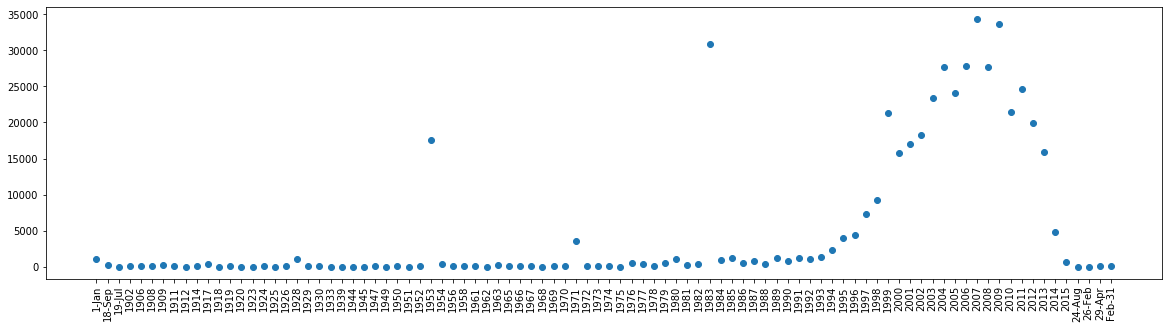

In [101]:
plt.figure(figsize = (20,5), frameon=False)
plt.xticks(rotation=90)
plt.plot(list(df_dropped['founded_at'].sort_values().unique()), ls, 'o')

## Question 3: Answer Question 2 for the Software Category

In [112]:
ls_software = []

for i in list(df_dropped['founded_at'].sort_values().unique()):
    ls_software.append(df_dropped[(df_dropped['founded_at'] == i) & (df_dropped['category_list'] == 'Software')]['funding_total_usd'].sum())
    
    
print(ls_software)

[68.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 35.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 0.0, 10.0, 0.0, 0.0, 0.0, 11.4, 0.0, 0.0, 0.0, 0.0, 0.5, 6.0, 0.0, 0.0, 10.0, 0.0, 4.5, 25.0, 0.0, 13.0, 0.0, 2.5726, 12.0, 0.75, 330.2, 0.0, 0.0, 288.3, 1030.5, 104.0, 346.0, 30127.201999999997, 200.26204800000002, 101.729971, 236.38709300000002, 66.680511, 114.068238, 246.649674, 190.7, 344.546725, 157.02749999999997, 123.93339999999999, 284.2, 722.272222, 1218.3065430000001, 1403.4045914199999, 2995.954001399, 6851.748235581001, 5274.368905, 3170.162111884, 3520.6371440000003, 9759.921296249999, 8078.887584, 6230.730723000001, 6664.218580000001, 8051.633184, 8089.574015, 9883.793102, 6659.123789, 8531.500703976, 8183.62137026, 4727.556383104, 1324.721404466, 159.1, 0.0, 0.0, 0.0, 0.0]


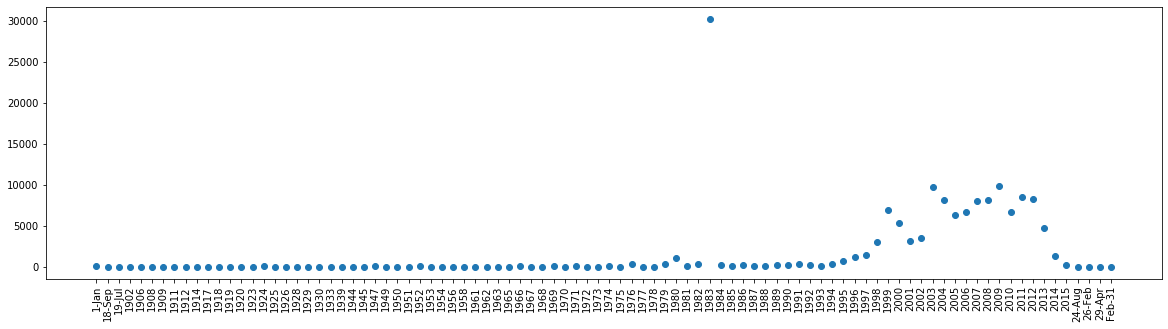

In [113]:
plt.figure(figsize = (20,5), frameon=False)
plt.xticks(rotation=90)
plt.plot(list(df_dropped['founded_at'].sort_values().unique()), ls, 'o')